In [63]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

Read data from GPS data file


In [64]:
data=pd.read_csv('GPS_data.csv')
data.head()

,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


A map of movement

In [65]:
import folium

location_frame = data[['latitude', 'longitude']]
location_list = location_frame.values.tolist()

ave_lat = np.mean(location_list, axis=0)[0]
ave_lon = np.mean(location_list, axis=0)[1]

#load map
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=18)

#draw lines of motion
folium.PolyLine(location_list, color="red", weight=2.5, opacity=1).add_to(my_map)
my_map.save("my_map.html")
my_map

Define Haversin formula

In [66]:
#Define Havaersin formula
#Inputs are the coordinates of 2 points, lon1, lat1, lon2, lat2
#Returns the distance between them

def haversin(lon1, lat1, lon2, lat2):
    """ Calculate the great circle distance in kl between 2 points on the earth (specified in decimal degree)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    #haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    r = 6371 #radius of earth in km
    return c*r

Derive Velocity using Haversin formula

In [67]:
lat = data['latitude'] #latitude
lon = data['longitude'] #longitude

data['dist'] = np.zeros(lat.shape[0]) 
data['time_diff'] = np.zeros(lat.shape[0])

for i in range(lat.shape[0]-1):
    data['dist'][i] = haversin(lon[i], lat[i], lon[i+1], lat[i+1])*1000 #distance in m
    data['time_diff'][i] = data['seconds_elapsed'][i+1] - data['seconds_elapsed'][i]

data['dist'][0] = 0
data['velocity'] = data['dist']/data['time_diff']

data.head()

C:\Users\Shehara\AppData\Local\Temp\ipykernel_3276\2898488296.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dist'][i] = haversin(lon[i], lat[i], lon[i+1], lat[i+1])*1000 #distance in m
C:\Users\Shehara\AppData\Local\Temp\ipykernel_3276\2898488296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_diff'][i] = data['seconds_elapsed'][i+1] - data['seconds_elapsed'][i]
C:\Users\Shehara\AppData\Local\Temp\ipykernel_3276\2898488296.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,velocity
0,0,3.703666,25.516165,65.071375,0.000000,1.636214,0.000000
1,1,5.339879,25.516227,65.071393,0.810401,0.340121,2.382686
2,2,5.680000,25.516240,65.071398,1.171329,0.631351,1.855274
3,3,6.311351,25.516264,65.071394,0.229699,1.012578,0.226845
4,4,7.323929,25.516267,65.071396,0.722069,1.005767,0.717928


Velocity Graph

Text(0.5, 1.0, 'Velocity vs Time')

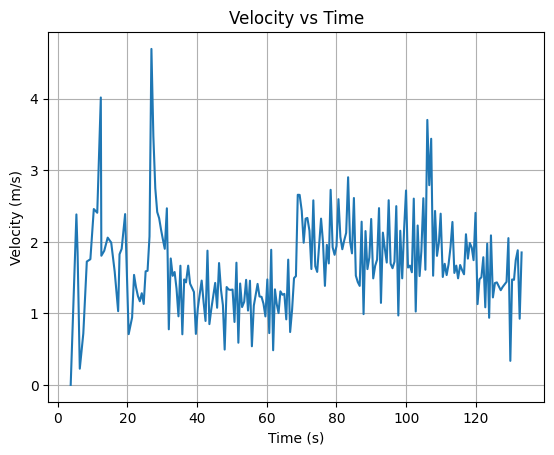

In [68]:
# read the data
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

plt.plot(data['seconds_elapsed'], data['velocity']) # derived from raw data gps
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')

Distance graph (increasing from zero)

Text(0.5, 1.0, 'Distance vs Time')

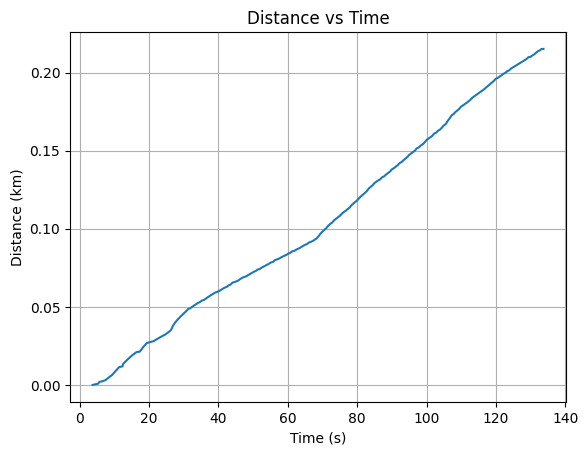

In [69]:
plt.plot(data['seconds_elapsed'], np.cumsum(data['dist'])/1000) #derived from raw data gps
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Distance (km)')
plt.title('Distance vs Time')

Derive accelearation 

In [70]:
# get the velocity and time data
velocity = data['velocity']
time = data['seconds_elapsed']
# calculate the acceleration
acceleration = np.diff(velocity)/np.diff(time)



Acceleartion graph derive from GPS Data

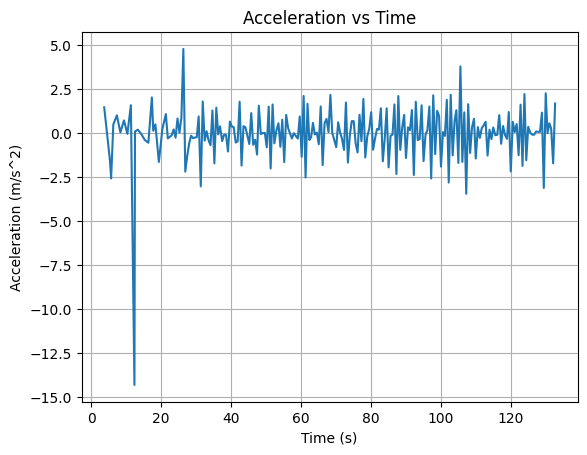

In [71]:
plt.plot(time[0:-1], acceleration)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time')
plt.show()

Average speed as a number

In [72]:
avg_speed = data['velocity'].mean()
print('Average speed:', avg_speed, 'm/s')


Average speed: 1.6782391458590495 m/s


Total Distance as a number

In [73]:
total_distance = data['total distance'] = np.sum(data['dist'])/1000
print('Total distance:', total_distance, 'km')

Total distance: 0.21514092455483325 km


Acceleartion for 3 components derived from acceleration data 

Read data from Acceleration data.csv

In [74]:
data_acceleration=pd.read_csv('Acceleration_data.csv')
data_acceleration.head()

,Unnamed: 0,seconds_elapsed,z,y,x
0,0,0.143440,-2.846008,-0.581977,-0.468246
1,1,0.159217,-2.651466,-0.560432,-0.418557
2,2,0.175117,-2.132024,-0.366186,-0.535990
3,3,0.190986,-1.023350,-0.041039,-0.522485
4,4,0.206763,-0.449766,0.229015,-0.356920


Plot the acceleration data

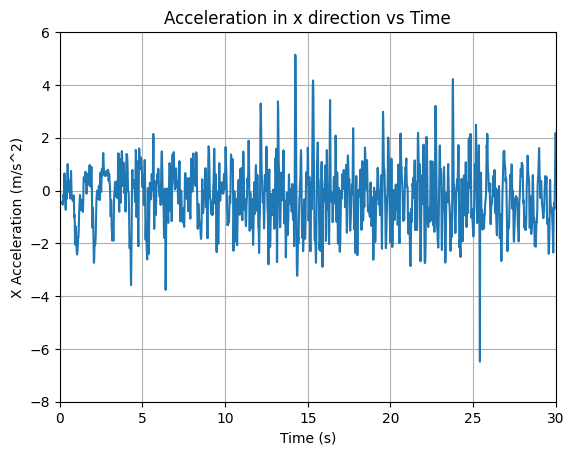

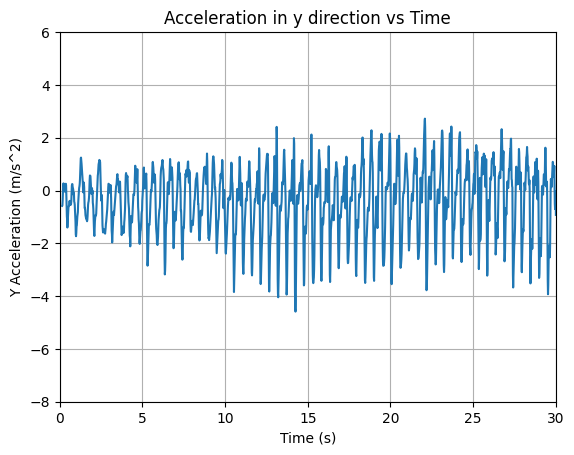

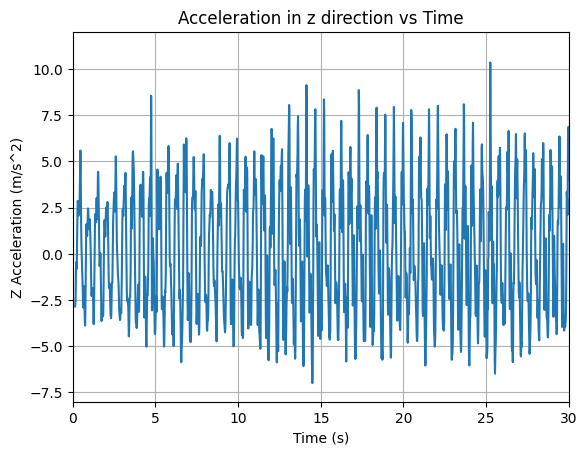

In [75]:

plt.plot(data_acceleration['seconds_elapsed'], data_acceleration['x'])
plt.grid()
plt.axis([0, 30, -8, 6])
plt.xlabel('Time (s)')
plt.ylabel('X Acceleration (m/s^2)')
plt.title('Acceleration in x direction vs Time')
plt.show()

plt.plot(data_acceleration['seconds_elapsed'], data_acceleration['y'])
plt.grid()
plt.axis([0, 30, -8, 6])
plt.xlabel('Time (s)')
plt.ylabel('Y Acceleration (m/s^2)')
plt.title('Acceleration in y direction vs Time')
plt.show()

plt.plot(data_acceleration['seconds_elapsed'], data_acceleration['z'])
plt.grid()
plt.axis([0, 30, -8, 12])
plt.xlabel('Time (s)')
plt.ylabel('Z Acceleration (m/s^2)')
plt.title('Acceleration in z direction vs Time')
plt.show()


To calculate number of steps, first choose the best component for that. There are two ways: (This step is optional)

1. determine which component captured the acceleration well by calculatiing sum of absolute value of components

In [76]:

# calculate the sum of linear acceleration
sum_x = data_acceleration['x'].abs().sum()
sum_y = data_acceleration['y'].abs().sum()
sum_z = data_acceleration['z'].abs().sum()

print('Sum of linear acceleration in x direction:', sum_x, 'm/s^2')
print('Sum of linear acceleration in y direction:', sum_y, 'm/s^2')
print('Sum of linear acceleration in z direction:', sum_z, 'm/s^2')

Sum of linear acceleration in x direction: 9603.94380273996 m/s^2
Sum of linear acceleration in y direction: 13128.732843633741 m/s^2
Sum of linear acceleration in z direction: 25602.166787147522 m/s^2


Z component has the largest sum of linear acceleration, therefore Z component use to calculate the number of steps.

2. Graph filtered component acelerations and determine which component shows the oscillating signals well

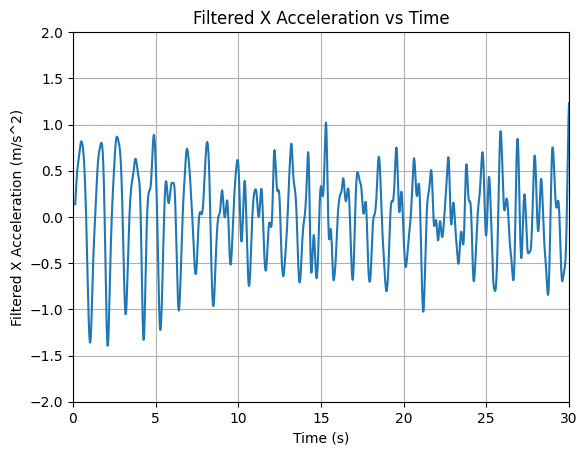

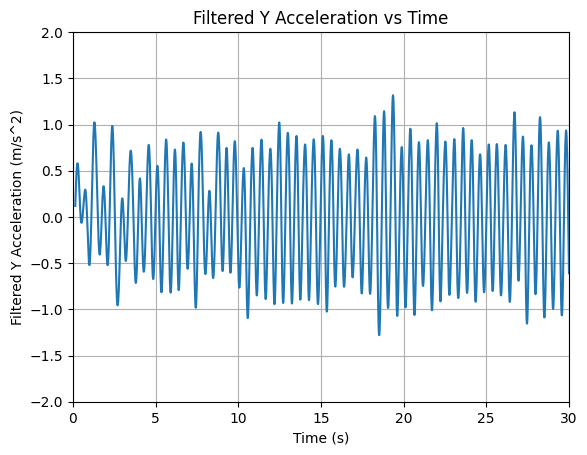

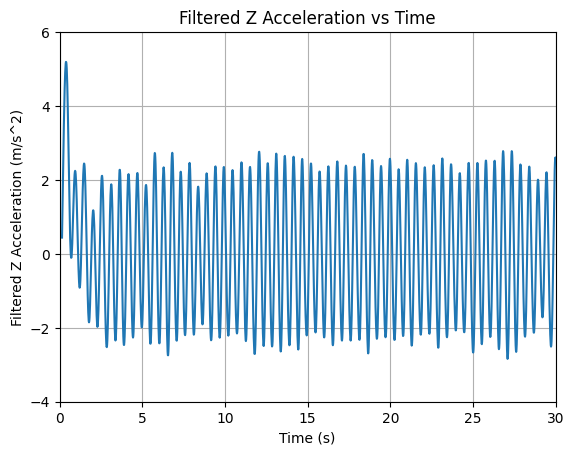

In [77]:
from scipy.signal import butter, filtfilt

# define the butterworth filter
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

noisy_x = data_acceleration['x']
noisy_y = data_acceleration['y']
noisy_z = data_acceleration['z'] 

time = data_acceleration['seconds_elapsed']

order = 2
dt = (time[len(time)-1] - time[0])/len(time)
fs = 1/dt
nyq = 0.5 * fs

cutOff_H = 1/5
cutOff_L = 1/0.5

lowpass_filter_x = butter_lowpass_filter(noisy_x, cutOff_L, fs, nyq, order)
final_signal_x = butter_highpass_filter(lowpass_filter_x, cutOff_H, fs, nyq, order)

lowpass_filter_y = butter_lowpass_filter(noisy_y, cutOff_L, fs, nyq, order)
final_signal_y = butter_highpass_filter(lowpass_filter_y, cutOff_H, fs, nyq, order)

lowpass_filter_z = butter_lowpass_filter(noisy_z, cutOff_L, fs, nyq, order)
final_signal_z = butter_highpass_filter(lowpass_filter_z, cutOff_H, fs, nyq, order)

# plot the filtered signals

plt.plot(time,final_signal_x)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Filtered X Acceleration (m/s^2)')
plt.title('Filtered X Acceleration vs Time')
plt.axis([0, 30, -2, 2])
plt.show()

plt.plot(time,final_signal_y)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Filtered Y Acceleration (m/s^2)')
plt.title('Filtered Y Acceleration vs Time')
plt.axis([0, 30, -2, 2])
plt.show()

plt.plot(time,final_signal_z)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Filtered Z Acceleration (m/s^2)')
plt.title('Filtered Z Acceleration vs Time')
plt.axis([0, 30, -4, 6])
plt.show()



Again it proved Z component has oscillating signal waves well and it is the best component to calculate number of steps.

Calculate Number of steps from filtered data of z component

In [78]:
steps = 0
for i in range(len(final_signal_z)-1):
    if final_signal_z[i] / final_signal_z[i+1] < 0:
        steps += 0.5
print('Number of steps:', steps)

Number of steps: 255.5


Does the acceleration calculated from the speed match the observed acceleration? What differences do you notice? What could be their cause?
Due to noise during measuring period, it can be different from the calculated acceleration value.

Is the number of steps logical?

The number of steps iterate through filtered signal of z component and increments the step count by 0.5. This approach provide a rough estimate of the number of steps.  It might not be 100% accurate due to noise in sensor data and variations in walking patterens. When consider about the total distance: 215m, and average step distance of a grown person: ~0.8m, this step count:255.5 seems logical.